Logistic Regression with Undersampling:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       145
           1       0.88      0.84      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



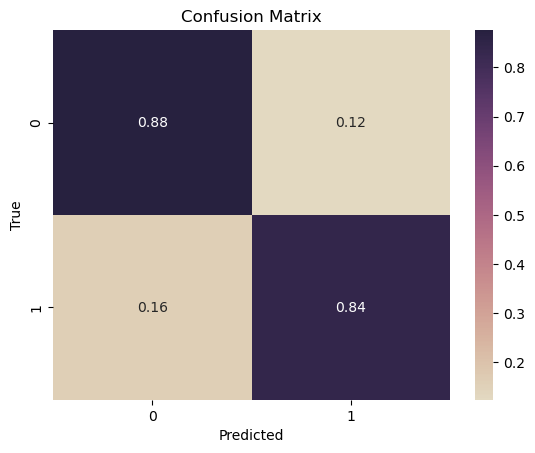

ROC AUC Score: 0.8573
Logistic Regression with Oversampling:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       145
           1       0.88      0.84      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



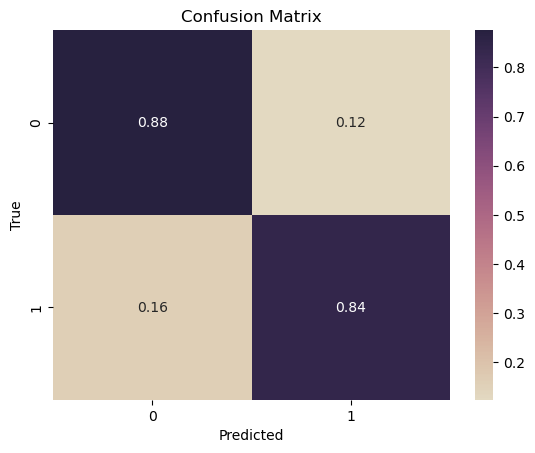

ROC AUC Score: 0.8573


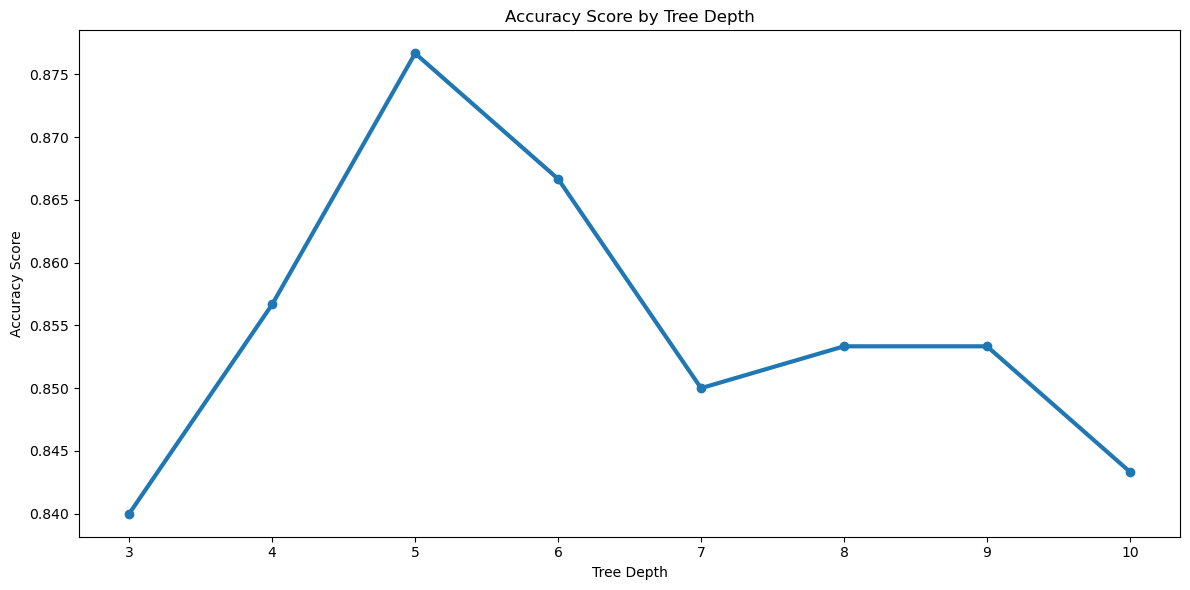

The best accuracy was 0.8767 with depth=5.


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import export_graphviz

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from collections import Counter
from IPython.display import Image  
import pydotplus

# Load your dataset
# Example: Load data from a CSV file
# df = pd.read_csv('your_dataset.csv')

# Replace 'your_feature_columns' and 'your_target_column' with actual column names
# X = df[['feature1', 'feature2', 'feature3']]  # Features
# y = df['target']  # Target variable

# For demonstration, let's create a sample dataset
# This should be replaced with your actual data loading logic
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random UnderSampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Apply Random OverSampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Logistic Regression on UnderSampled Data
log_reg_under = LogisticRegression()
log_reg_under.fit(X_rus, y_rus)
y_pred_log_under = log_reg_under.predict(X_test)

# Define a function to print evaluation metrics and plot confusion matrix with yellow and pink colors
def report(pred):
    print(classification_report(y_test, pred))
    fig, ax = plt.subplots()
    
    # Define a custom colormap using yellow and pink shades
    cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
    
    # Plot the confusion matrix with the new colormap
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=ax, cmap=cmap)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    plt.show()
    
    print(f'ROC AUC Score: {round(roc_auc_score(y_test, pred), 4)}')

# Report for Logistic Regression on UnderSampled Data
print("Logistic Regression with Undersampling:")
report(y_pred_log_under)

# Logistic Regression on OverSampled Data
log_reg_over = LogisticRegression()
log_reg_over.fit(X_ros, y_ros)
y_pred_log_over = log_reg_over.predict(X_test)

# Report for Logistic Regression on OverSampled Data
print("Logistic Regression with Oversampling:")
report(y_pred_log_over)

# Decision Tree Classifier - Tuning max_depth
n = 11  # Maximum depth to evaluate
acc_tree = np.zeros((n - 3))

for i in range(3, n):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(X_rus, y_rus)
    y_pred_tree = tree.predict(X_test)
    acc_tree[i - 3] = accuracy_score(y_test, y_pred_tree)

# Plotting Accuracy by Tree Depth
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range(3, n), acc_tree, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Tree Depth')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Tree Depth')
plt.tight_layout()
plt.show()

# Print the best depth for Decision Tree
best_depth = acc_tree.argmax() + 3
print(f'The best accuracy was {round(acc_tree.max(), 4)} with depth={best_depth}.')
